We have been requested to analyze a dataset with vehicle information from USA in order to create a model to predict the price of this vehicles. 

Let's begin by importing libraries and the dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('C:/Users/cim_3/Desktop/Projectos python/Car Price prediction/CarPrice_Assignment.csv')

Let's take a look at our data

In [3]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## 1. Data cleaning

The column 'car_ID' won't be needed in our analysis, so we could eliminate it from the dataset

In [4]:
data = data.drop(['car_ID'], axis=1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [6]:
data['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

As we are interested in the car manufacturer, we are going to split the CarName to get it

In [5]:
data['CarName'] = data['CarName'].str.split(' ', expand=True)
data['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

There are mistaken car labels (maxda instead of mazda, toyouta instead of toyota...). We've to correct them

In [6]:
data['CarName'] = data['CarName'].replace({'alfa-romero':'alfa-romeo', 'maxda':'mazda', 'Nissan':'nissan', 'porcshce':'porsche',
                                          'toyouta':'toyota', 'vokswagen':'volkswagen', 'vw':'volkswagen'})

## 2. Exploratory Data Analysis



In [7]:
data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Let's see the popularity of the diferents carnames

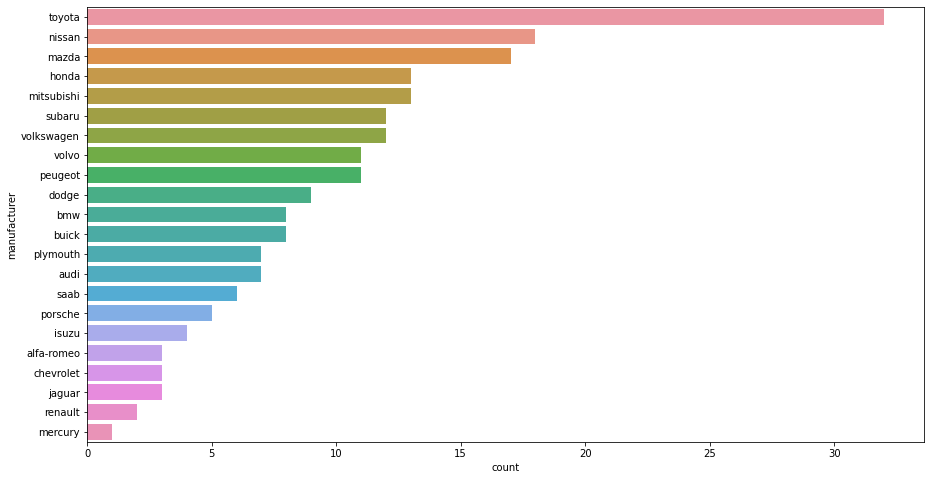

In [14]:
manufacturer = pd.DataFrame(data['CarName'].value_counts()).reset_index().rename(columns={'index':'manufacturer', 'CarName':'count'})

plt.figure(figsize = (15,8))
plot = sns.barplot(y='manufacturer',x='count',data=manufacturer)
plot=plt.setp(plot.get_xticklabels(), rotation=0)

Japanese manufacturers are the most popular in the dataset with Toyota in the 1st place. The least popular manufacturer is Mercury followed by Renault

We now will see the vehicle distribution for each feature. First, we have to identify numeric and non-numeric columns

In [89]:
numeric_cols = data.select_dtypes(exclude = ['object']).columns
category_cols = data.select_dtypes(include = ['object']).columns

In [17]:
data[numeric_cols].head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [18]:
data[category_cols].head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romeo,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romeo,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romeo,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


#### Aspiration Ratio

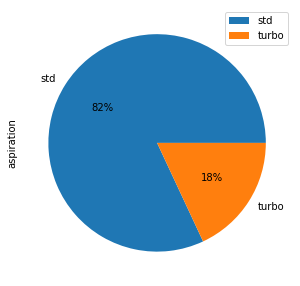

In [20]:
aspiration = pd.DataFrame(data['aspiration'].value_counts())
plot = aspiration.plot.pie(y='aspiration', figsize=(10,5),autopct='%1.0f%%')

In the dataset, 82% of the vehicles have standard aspiration while only 18% have turbo aspiration.

#### Door number Ratio

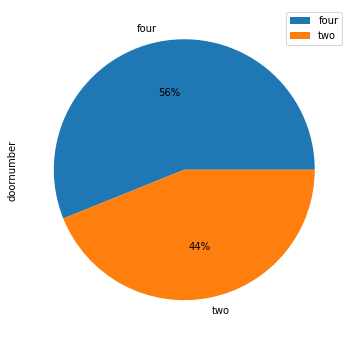

In [25]:
door_number = pd.DataFrame(data['doornumber'].value_counts())
plot = door_number.plot.pie(y='doornumber', figsize=(10,6),autopct='%1.0f%%')

Four doors is the most frecuent design among the car in the dataset. It means there are 115 four-doors-vehicles.

#### Carbody Ratio

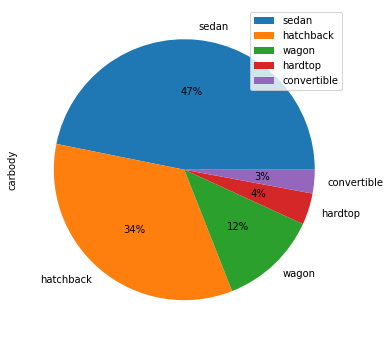

In [27]:
carbody = pd.DataFrame(data['carbody'].value_counts())
plot = carbody.plot.pie(y='carbody', figsize=(10,6),autopct='%1.0f%%')

Sedan is the most frecuent carbody in the dataset followeb by hatchback cars. Convertible cars are the least common.

#### Cylinder number distribution

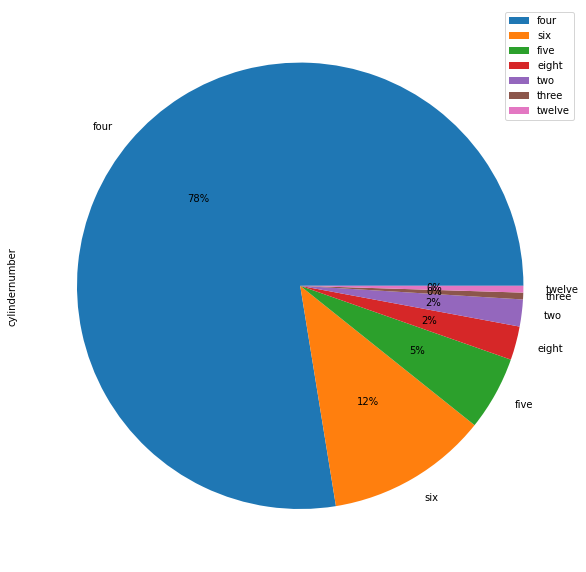

In [32]:
cylindernumber = pd.DataFrame(data['cylindernumber'].value_counts())
plot = cylindernumber.plot.pie(y='cylindernumber', figsize=(10,15),autopct='%1.0f%%')

4-cylinder vehicles are the most frecuent of the dataset (78%) with 6-cylinder vehicles in the second position (12%)

#### Fuel type Ratio

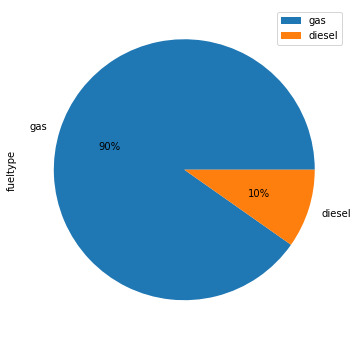

In [26]:
fuel_type = pd.DataFrame(data['fueltype'].value_counts())
plot = fuel_type.plot.pie(y='fueltype', figsize=(10,6),autopct='%1.0f%%')

185 cars use gas as fuel while 20 use diesel.

Let's see now price distribution for some of the features in the dataset

#### Price distribution vs aspiration

C:\Users\cim_3\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cim_3\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of ages of turbo aspiration vehicles')

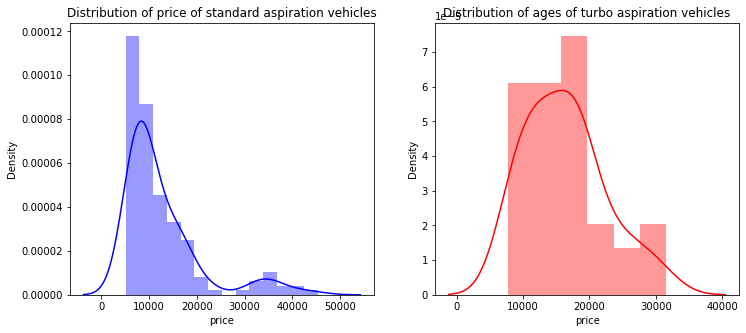

In [38]:
f = plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.aspiration == 'std')]["price"], color='b',ax=ax)
ax.set_title('Distribution of price of standard aspiration vehicles')

ax=f.add_subplot(122)
sns.distplot(data[(data.aspiration == 'turbo')]['price'], color='r',ax=ax)
ax.set_title('Distribution of ages of turbo aspiration vehicles')

Price of standard vehicles is between 5000 and 20000, with some vehicles over 30000 (outliers). In turbo vehicles the price is 
between 10000 and 30000, without outliers.

<AxesSubplot:xlabel='aspiration', ylabel='price'>

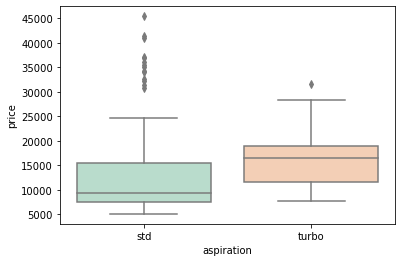

In [42]:
sns.boxplot(x ='aspiration', y = 'price', data=data, palette = 'Pastel2')

Price of turbo is higher in compared to std , although there are some outliers in std price.

#### Price distribution according to carbody

<AxesSubplot:xlabel='carbody', ylabel='price'>

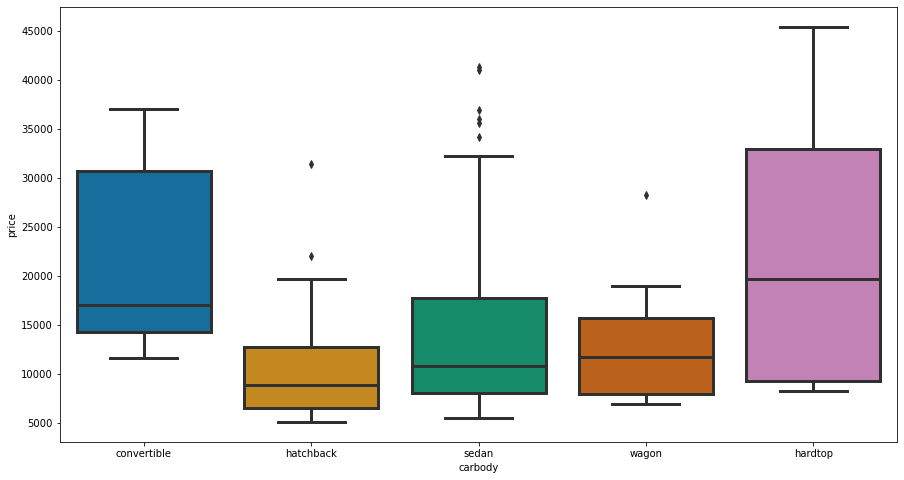

In [50]:
plt.figure(figsize = (15,8))
sns.boxplot(x = 'carbody', y = 'price', data = data, palette='colorblind', linewidth = 3)

Hardtop vehicles are the most expensive while hatchback cars tend to be cheaper. Hardtop median price is about 20000, followed
by convertible cars. There are outliers in hatchback, sedan and wagon carbodies.

#### Price distribution according to engine type

<AxesSubplot:xlabel='enginetype', ylabel='price'>

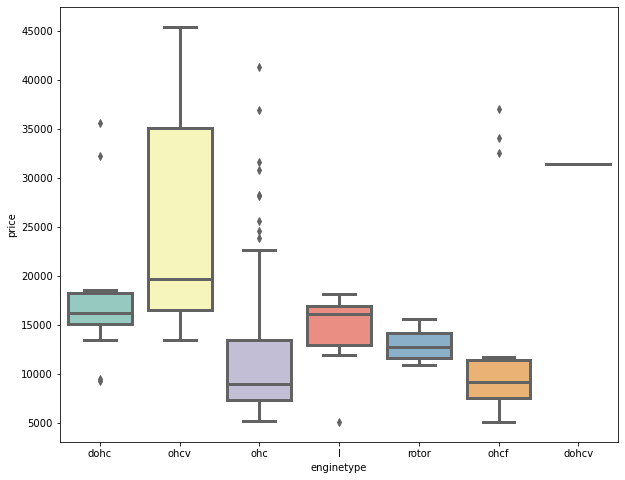

In [54]:
plt.figure(figsize = (10,8))
sns.boxplot(x = 'enginetype', y = 'price', data = data, palette='Set3', linewidth = 3)

Price range of ohcv engine cars is quite high in comparison to others. There are outliers for dohc, ohc and ohcd engine types.
Median price for ohcv engine type cars is about 20000, with a maximum of 45000. 
There is only 1 observation for dohcv engine type.

In [ ]:
#### Price distribution according to cylinder number

<AxesSubplot:xlabel='cylindernumber', ylabel='price'>

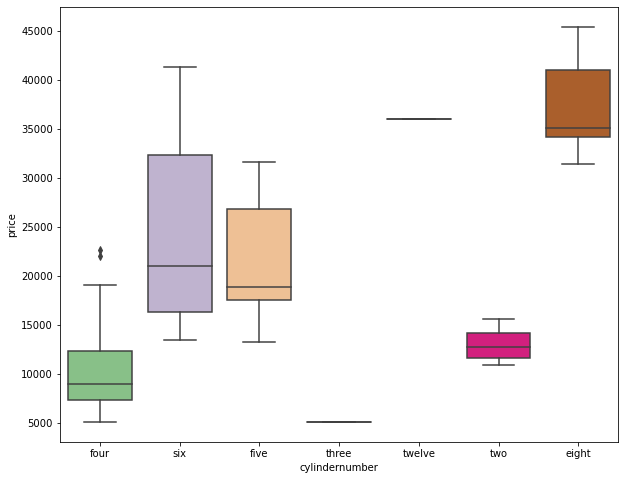

In [57]:
plt.figure(figsize = (10,8))
sns.boxplot(x = 'cylindernumber', y = 'price', data = data, palette='Accent')

In [ ]:
Most expensive cars are those with eight cylinders, with a median price of 35000. 
Cheaper cars are those with only three and four cylinders.

So far, we have only analyzed the distribution of price according to the categorical columns. Let's see now how it is related to the different numeric columns.

#### Engine size vs price

<AxesSubplot:xlabel='enginesize', ylabel='price'>

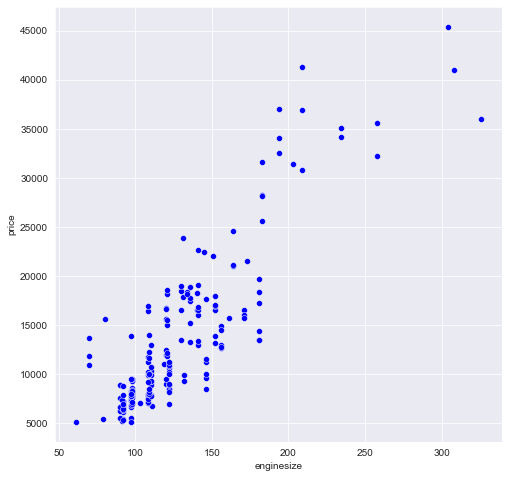

In [67]:
plt.figure(figsize = (8,8))
sns.set_style("darkgrid")
sns.scatterplot(x="enginesize", y="price", data=data, color='b')

As engine size increases car price increases, which is something that fits our assumptions of a positive relation. 

#### Peakprm vs price

<AxesSubplot:xlabel='peakrpm', ylabel='price'>

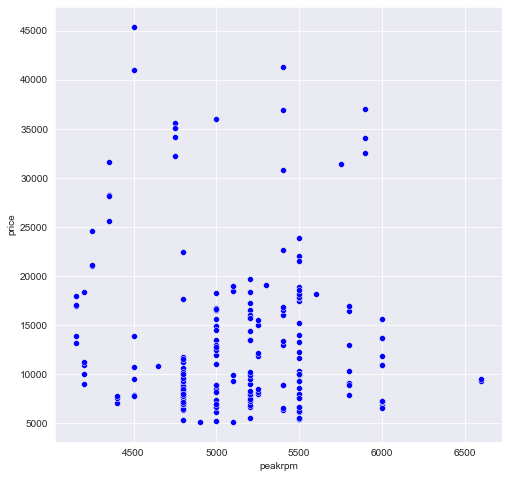

In [68]:
plt.figure(figsize = (8,8))
sns.set_style("darkgrid")
sns.scatterplot(x="peakrpm", y="price", data=data, color='b')

It seems there is not a strong relationship between peakprm and price.

#### Horsepower vs price

<AxesSubplot:xlabel='horsepower', ylabel='price'>

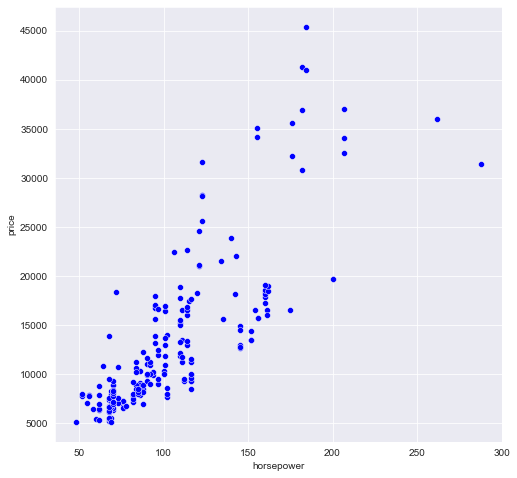

In [70]:
plt.figure(figsize = (8,8))
sns.set_style("darkgrid")
sns.scatterplot(x="horsepower", y="price", data=data, color='b')

Similarly to enginesize, horsepower and price are possitivly related. Most frecuent values for horsepower are between 50 and 150.

In [ ]:
#### Highwaympg vs Price

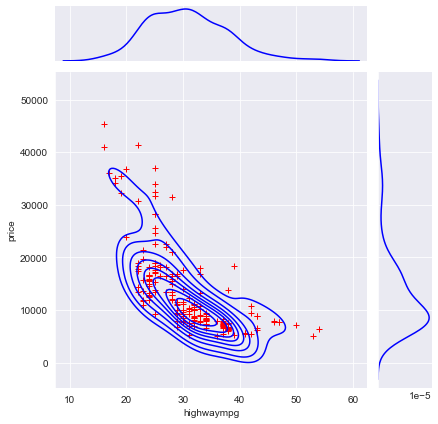

In [72]:
g = sns.jointplot(x="highwaympg", y="price", data=data, kind="kde", color="b")
g.plot_joint(plt.scatter, c="r", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("highwaympg", "price");

Negative relationship between highwaympg and price.

Instead of analizing each feature individually, we will plot a heatmap of the numeric features so we can appreciate the stronger relationships. 

<AxesSubplot:>

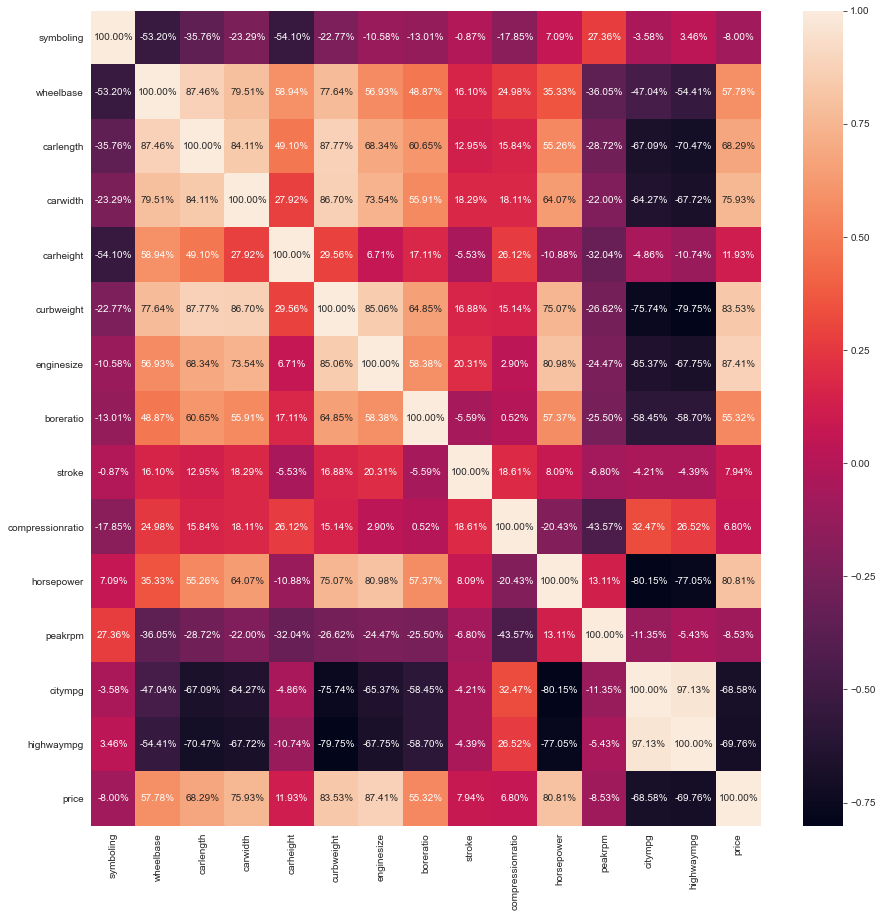

In [76]:
plt.figure(figsize = (15,15))
sns.heatmap(data[numeric_cols].corr(), annot=True, fmt=".2%")

The features with a stronger correlation with price (+50% or -50%) are wheelbase, carlength, carwidth, curbweight, enginesize,
boreratio, horsepower, citympg and highwaympg. Let's see the distribution of their values according to price

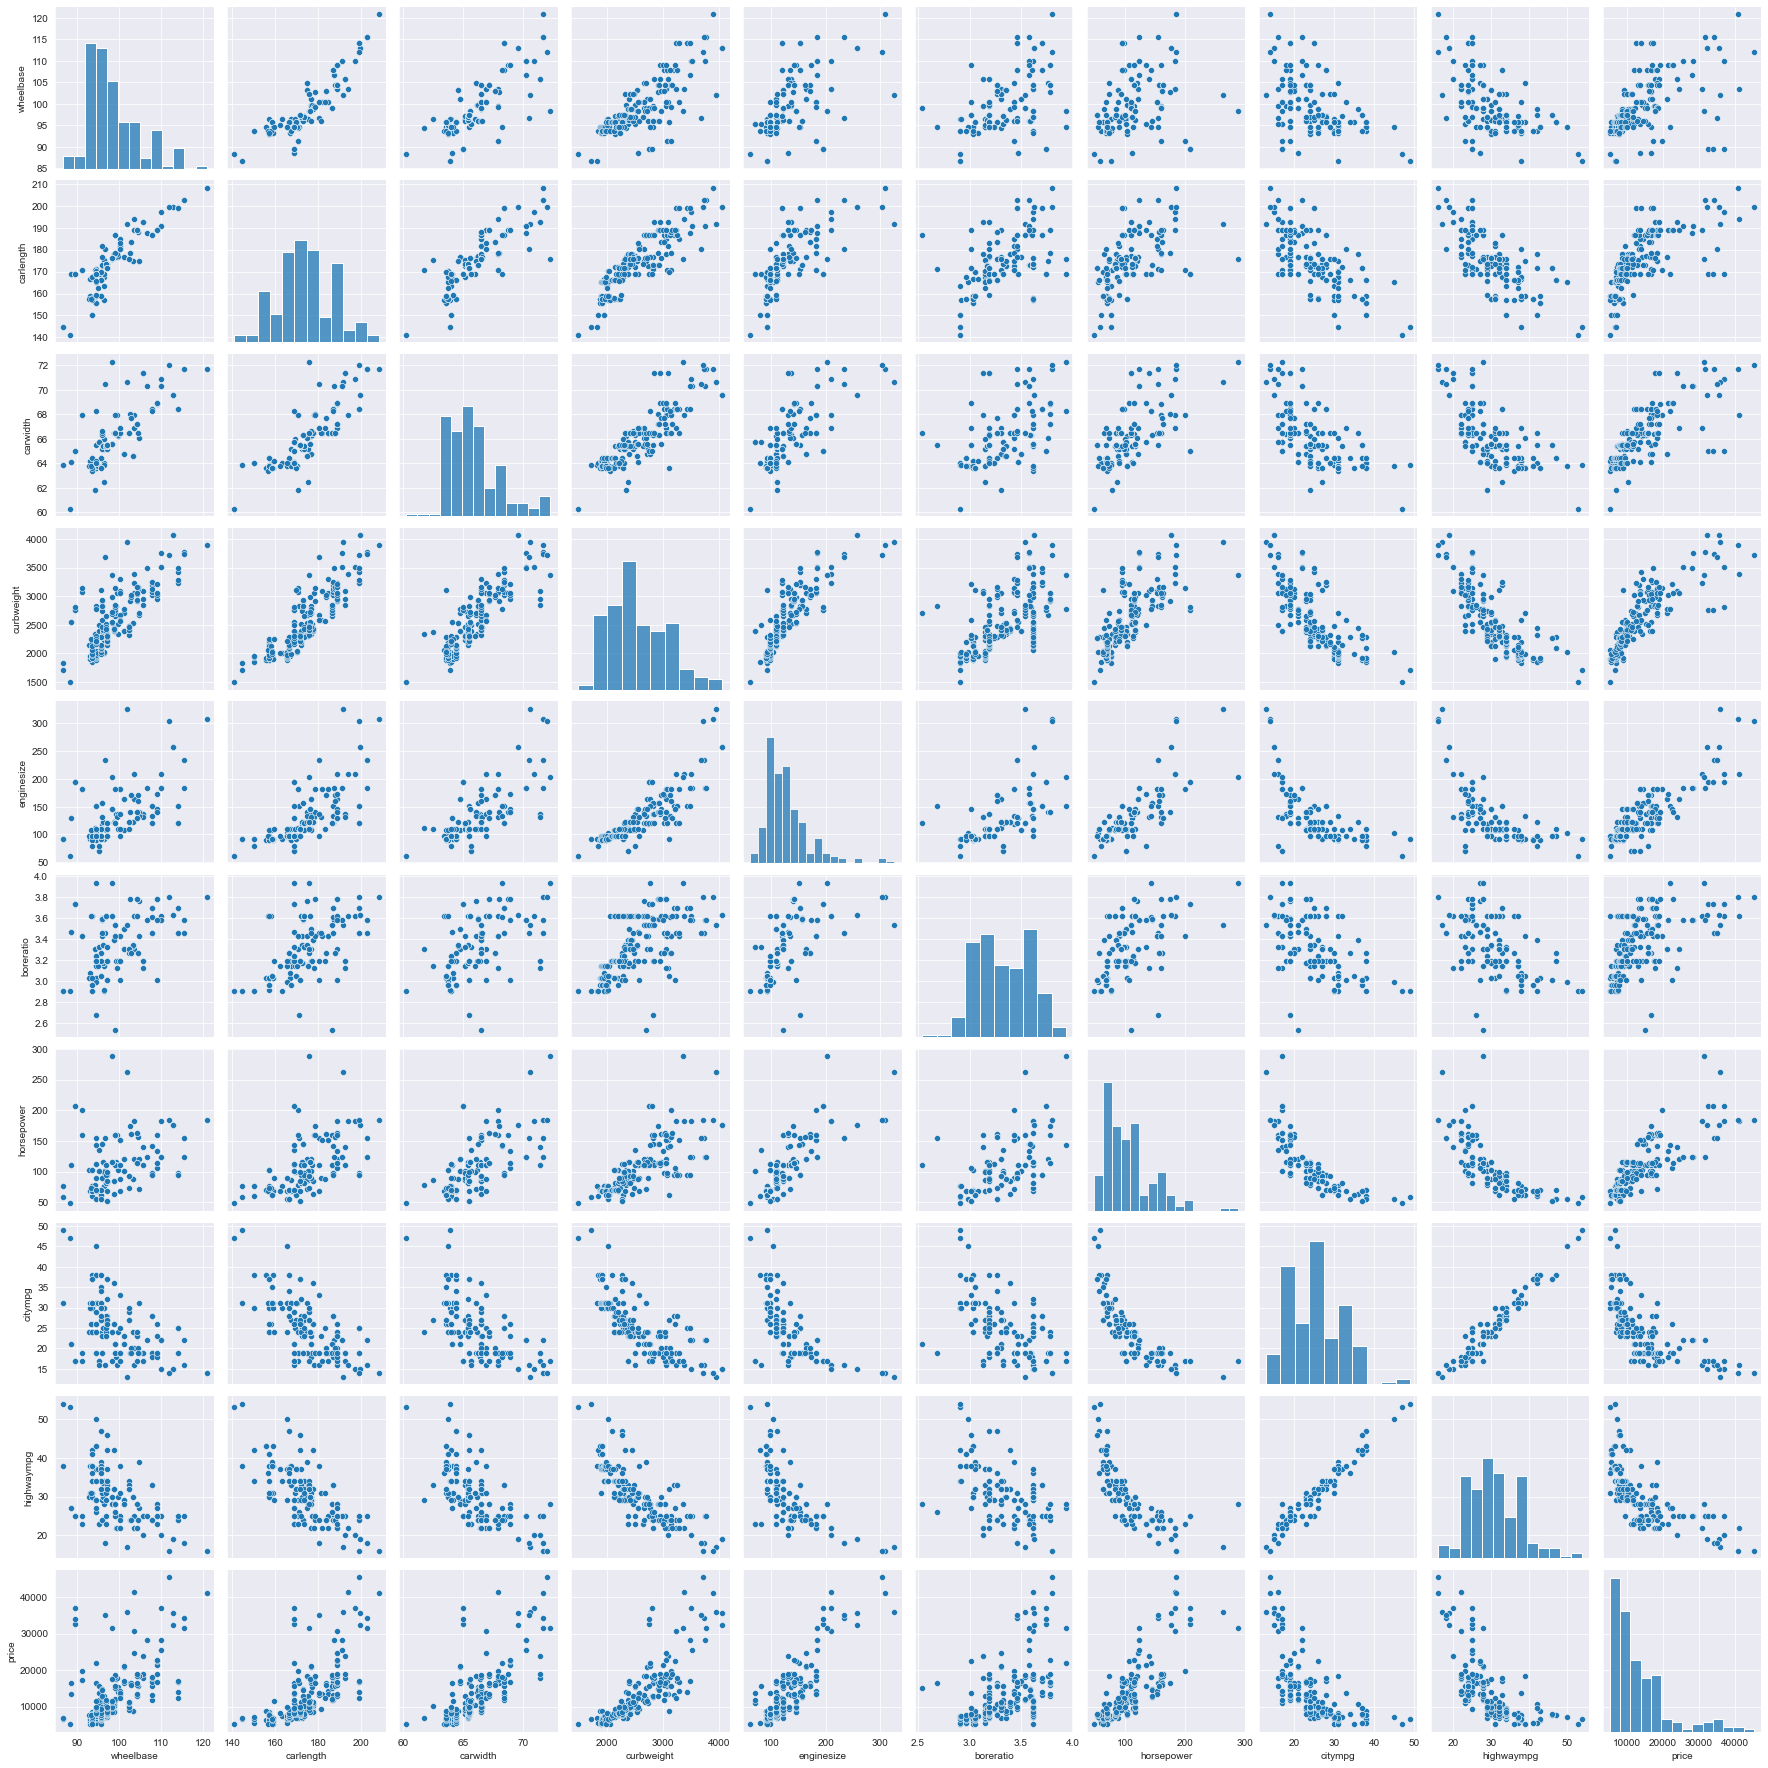

In [77]:
col = ["wheelbase", "carlength", "carwidth", "curbweight", "enginesize", "boreratio", "horsepower", "citympg", "highwaympg",
       "price"]

sns.pairplot(data[col])

Most features show a possitive relationship with price, except citympg and highwaympg.

## 3. Data cleaning

Let's check the relationship between numeric features and price and elaborate a linear regression function.

We divide the variables into two sets: dependent (or target variable “Y”) and independents (or feature variables “X”)

In [90]:
X=data[numeric_cols].drop('price',axis=1)
y=data['price']

We will perform the linear regression with 2 libraries: Statsmodels y Sklearn

### Sklearn

In [94]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 -51650.649966446945
Coefficients: 
 [ 2.85882938e+02  1.67699014e+02 -9.48178689e+01  4.66618488e+02
  1.94752228e+02  1.87760052e+00  1.16781981e+02 -9.84427597e+02
 -3.05616201e+03  2.86475236e+02  3.25013507e+01  2.35817584e+00
 -2.86939704e+02  1.91303607e+02]


### Statsmodels

In [95]:
import statsmodels.api as sm

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     78.05
Date:                Mon, 06 Sep 2021   Prob (F-statistic):           7.97e-71
Time:                        13:46:37   Log-Likelihood:                -1936.7
No. Observations:                 205   AIC:                             3903.
Df Residuals:                     190   BIC:                             3953.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -5.165e+04   1.57e+04  

R-squared is 0.852. It means that our model explain 82% of the variance of price. 
Looking at the P>|t| column we can see that many feature have p-value greater than the common p-value 0.05. It means they are not statiscally significant, so we could eliminate them from the model.

In [98]:
X=data[['enginesize', 'stroke', 'compressionratio', 'horsepower', 'peakrpm']]
y=data['price']

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     187.0
Date:                Mon, 06 Sep 2021   Prob (F-statistic):           3.59e-73
Time:                        13:59:21   Log-Likelihood:                -1954.1
No. Observations:                 205   AIC:                             3920.
Df Residuals:                     199   BIC:                             3940.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.444e+04   4311.096  

F-statistic tell us if we should accept the Null Hypotheses (H0), which states that all the coefficients are equal to zero, and there’s no relationship between predictors and target (meaning that a model with no independent variables fits the data as well as your model). The higher the F-statistic, the more evidence we have to reject Null Hypothese. 
Considering above regressions, we can see that F-statistic increase a lot in the second case (187). This means we have enough evidence to reject null hypothesis and, at least, one predictor is useful in predicting the car price.

Also, the probability of occurrence of the F-statistic under the assumption that the null hypothesis is true, which is 3.59e-73, an exceedingly small number lower than 1%. This means that there is much less than 1% probability that the F-statistic of 187 could have occurred by chance under the assumption of a valid Null hypothesis.